In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [5]:
import pandas as pd
df = pd.read_csv("/Users/williammosconiii/Desktop/Political_Ad_Data.csv")
with open("/Users/williammosconiii/Desktop/Political_Ad_Data.csv", "r") as csv_file:
    df

#### What type of Ads to people think americans want to see? In this Analysis we will explore a data set from the US 2016 national and statewide elections including 300,000 Ads aired and descriptive elements for each Ad. We will focus on the overall "Message" (Pro, Con, or Mixed) of the Ads.  Let's take a look at the column names to understand the data available to analyze.

In [6]:
df.columns

Index(['id', 'wp_identifier', 'network', 'location', 'program', 'program_type',
       'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsors',
       'sponsor_types', 'race', 'cycle', 'subjects', 'candidates', 'type',
       'message', 'date_created'],
      dtype='object')

#### We can see 'message' is one of the column names, let's now take a look at the data inside this column.

In [8]:
df.message.unique()

array(['pro', 'con', 'mixed', 'unknown', 'mix'], dtype=object)

In [ ]:
#### It looks like our data has multiple ways to express the "Message" characteristic. Let's clean up the data to make it more usable for our analysis. For our purposes we will assume that 'mixed', 'unknown', and 'mix' all mean the Ad has a 'mixed' 'message'
df.message=df.message.apply (lambda x: 'mixed' if x == 'mix' or x == 'unknown' else x)

In [10]:
# Let's validate that our data cleaning has worked.
df.message.unique()

array(['pro', 'con', 'mixed'], dtype=object)

In [11]:
# As Ad "Message" will be key to our analysis let's take a look at the Value counts for "Message"
df.message.value_counts()

mixed    132151
con      128108
pro      115091
Name: message, dtype: int64

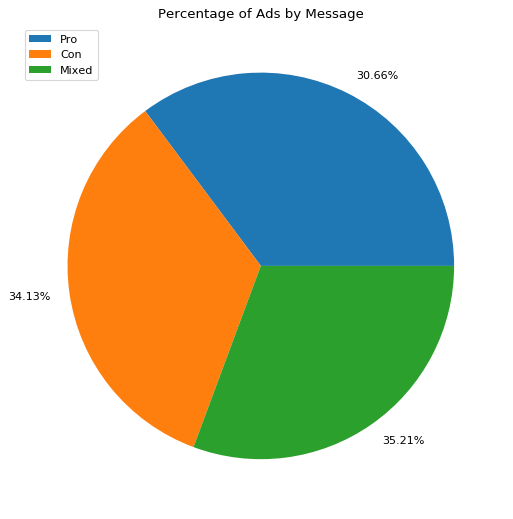

In [9]:
# Let's take a look at the overal distribution of Ad Message in a visual.
pro_count = '{0:.2f}'.format(len(df[df['message'] == 'pro'])/len(df)*100) + '%'
con_count = '{0:.2f}'.format(len(df[df['message'] == 'con'])/len(df)*100) + '%'
mixed_count = '{0:.2f}'.format(len(df[df['message'] == 'mixed'])/len(df)*100) + '%'
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
df.message.value_counts().plot(kind='pie', labels=[pro_count, con_count, mixed_count])
plt.title('Percentage of Ads by Message')
plt.ylabel('')
plt.legend(loc = 'upper left')
plt.legend(['Pro', 'Con', 'Mixed'])

In [10]:
# It looks like, in total, the Ads are evenly distributed throughout the 3 message types.
# Let's take a look at some other columns.

In [13]:
# Let's start with the 'program_type'. We can group our data by to see how 'message' is distributed across 'program_type'
df12 = df.groupby(['program_type','message'])['id'].count().unstack()
df12

message,con,mixed,pro
program_type,,,
news,84591,84944,72388
not news,43517,47207,42703


In [14]:
#Null Hypothesis: There is no difference among the number of ads with con, mixed and pro message and between program type (news vs not news)
#Hypothesis A: There is a difference....

In [15]:
# With the chi^2 tool we can conduct a test
from scipy.stats import chi2_contingency
pt_chi = np.array([[84591, 84944, 72388], [43517, 47207, 42703]])
chi2_contingency(pt_chi)
g, p, dof, expctd = chi2_contingency(pt_chi, lambda_="log-likelihood")
print(p)

8.082842010252112e-58


In [16]:
#Since the p-value (8.08 x 10^ -58) is less than alpha = 0.05, we conclude that the null hypothesis is rejected.
#Let's take a look at another column to see if the hyphothesis holds for other values.

In [17]:
#We have data for start time and end time of the Ads, however, the data is not easy to work with as it shows
#the time on each to the second. Let's create a function to manipulate our data into something we can work with.
#We will define three different time periods (Morning, Afternoon, and Evening) so we can group our data.
def timefunction(a):
    a = int(a)
    if a >= 4 and a <= 12:
        return 'Morning'
    elif a > 12 and a <= 19:
        return 'Afternoon'
    else:
        return 'Evening'

In [18]:
#Now that we have defined our function (timefunction) we can apply it to our data.
df.start_time.value_counts()
#4-12 Morning 12-7 Afternoon 7-4 Evening
df['AirTime'] = df['start_time'].apply(lambda x: timefunction(x[11:13]))

In [20]:
#After the function is applied we can group our data
df13 = df.groupby(['AirTime', 'message'])['id'].count().unstack()
df13

message,con,mixed,pro
AirTime,,,
Afternoon,36972,36999,33649
Evening,52131,55089,47400
Morning,39005,40063,34042


In [21]:
#Now that we have our data in a dataframe we can conduct our second chi^2 test
#Null Hypothesis: There is no difference among the number of ads with con, mixed and pro message between airtime(Afternoon, Evening, Morning))
#Hypothesis B: There is a difference....
pt_chi = np.array([[36972, 36999, 33649], [52131, 55089, 47400],[39005, 40063, 34042]])
chi2_contingency(pt_chi)
g, p, dof, expctd = chi2_contingency(pt_chi, lambda_="log-likelihood")
print(p)

4.731777456594661e-14


In [ ]:
#Since the p-value (4.73 x 10^ 14) is less than alpha = 0.05, we conclude that the null hypothesis is rejected.

In [24]:
# Let's take a look at the other columns' unique values to see how we can analyze our Ads further.
df.location.unique()

array(['Las Vegas, NV', 'Raleigh-Durham-Fayetteville,  NC',
       'Tampa-St. Petersburg, FL', 'Cleveland, Ohio',
       'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa', 'Philadelphia, PA',
       'Denver, CO', 'Milwaukee, WI',
       'San Francisco-Oakland-San Jose, CA', 'Phoenix-Prescott, AZ',
       'Boston, MA/Manchester, NH', 'Washington, DC/Hagerstown, MD',
       'Orlando-Daytona Beach-Melbourne, FL', 'Sioux City, Iowa',
       'New York City, NY', 'Reno, NV', 'Cincinnati, OH',
       'Des Moines-Ames, Iowa', 'Norfolk-Portsmouth-Newport News, NC',
       'Greenville-Spartanburg, SC/Asheville-Anderson, NC',
       'Colorado Springs-Pueblo, CO', 'Miami-Fort Lauderdale, FL',
       'Charlotte, NC', 'Columbia, SC', 'Roanoke-Lynchburg, VA', nan],
      dtype=object)

In [22]:
# Location looks like a good way to analyze our Ads.

In [26]:
# Before we look at each location's Ad count let's take a look at the average of all locations for a baseline.
df.location.value_counts()
x = df.location.value_counts()
np.mean(x)

15013.0

In [27]:
# Let's look at the number of Ads show in each Location.
df.location.value_counts()

Boston, MA/Manchester, NH                            50920
Philadelphia, PA                                     44326
Las Vegas, NV                                        42131
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         24580
Tampa-St. Petersburg, FL                             24207
Cleveland, Ohio                                      23156
San Francisco-Oakland-San Jose, CA                   20944
Des Moines-Ames, Iowa                                17726
Raleigh-Durham-Fayetteville,  NC                     17437
Milwaukee, WI                                        15423
Sioux City, Iowa                                     12906
Phoenix-Prescott, AZ                                 12900
Washington, DC/Hagerstown, MD                        12325
Denver, CO                                           10901
Columbia, SC                                         10870
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8565
Reno, NV                                              60

In [27]:
# Where are negative Ads most likely to be deployed?
# Here we group our data by location and message to take a look.
df3 = df.groupby(['location','message'])['id'].count()
# Now let's name our columns and show an ad count.
df3.columns = ['location', 'message', 'ad count']
df3

location                                           message
Boston, MA/Manchester, NH                          con        19554
                                                   mixed      17760
                                                   pro        13606
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa       con         3660
                                                   mixed      12316
                                                   pro         8604
Charlotte, NC                                      con          129
                                                   mixed       1689
                                                   pro          712
Cincinnati, OH                                     con          179
                                                   mixed       1539
                                                   pro         2313
Cleveland, Ohio                                    con        10447
                                                   mixed 

In [28]:
# Let's check to see if our grouping worked.
len(df[(df.location == "Reno, NV") & (df.message == 'con')])

44

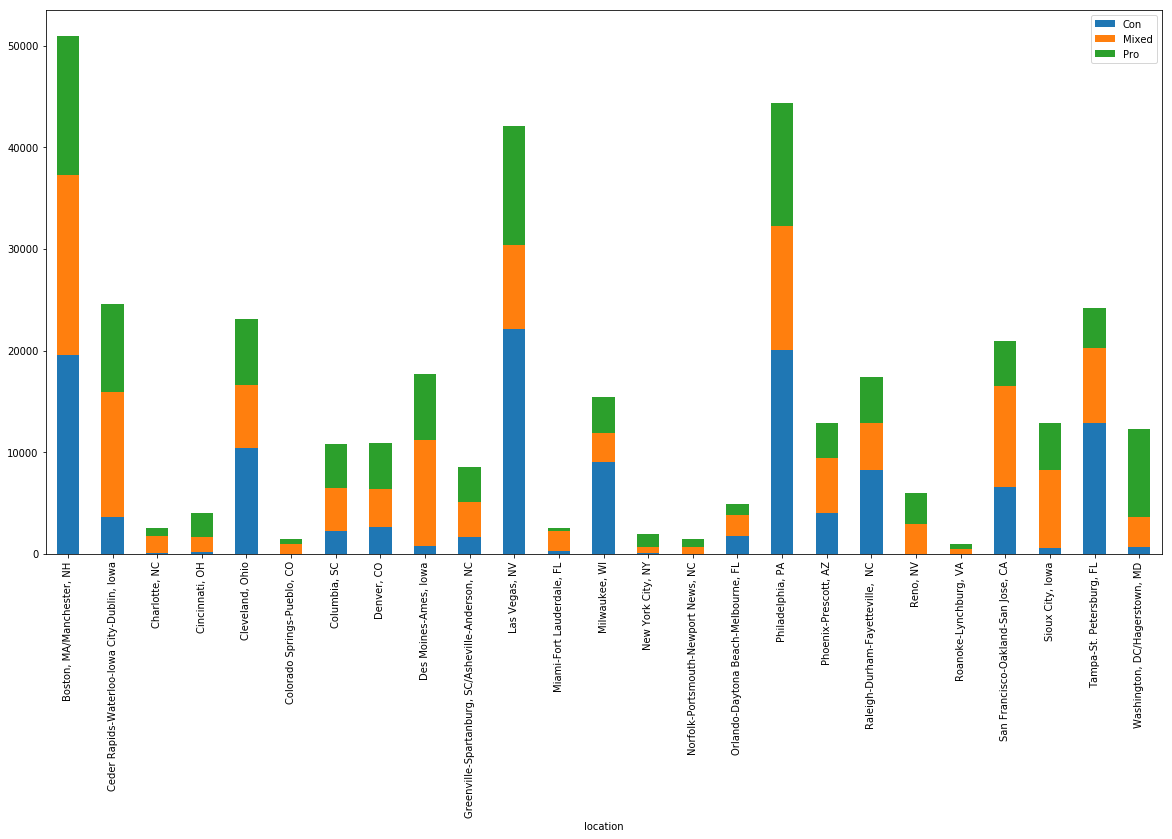

In [22]:
# Here we will create a stacked bar chart to look at the mix of message type by location.
from matplotlib.pyplot import figure
##figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (20,10)
df3 = df.groupby(['location','message'])['id'].count().unstack()
df3.columns = ['Con', 'Mixed', 'Pro']
df3.plot(kind='bar', stacked=True)

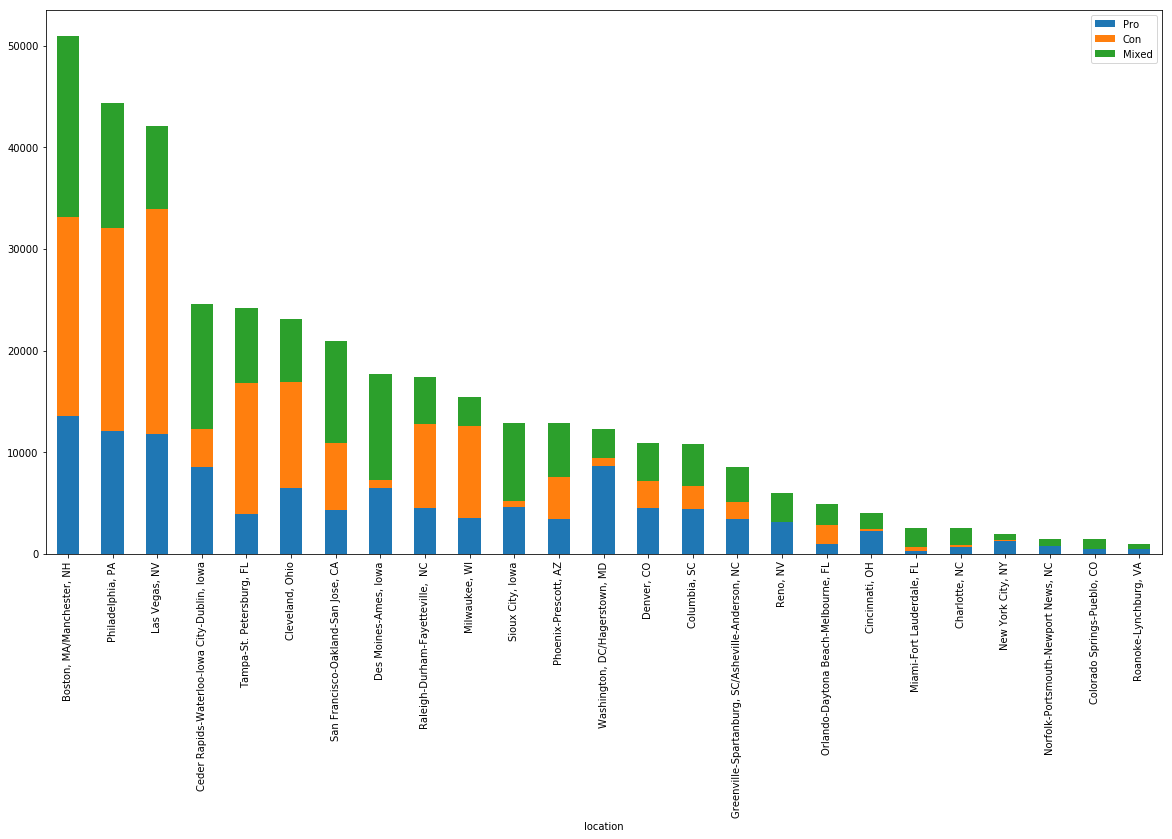

In [21]:
# Let's arange the graph to show the locations in decending order by total Ads shown.
df3['total'] = df3['Pro'] + df3['Con'] + df3['Mixed']
df4 = df3.loc[df3['total'].sort_values(ascending=False).index.tolist()]
df4 = df4[['Pro', 'Con', 'Mixed']]
df4.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (16,8)

In [37]:
# Let's take a look at the data as a percentage to see if Ads are more likely to be negative in some locations
df3['Percent Con'] = df3['Con'] / df3['total']
df3['Percent Con'] = df3['Percent Con'].apply(lambda x: '{0:.2f}'.format(x))
df3['Percent Pro'] = df3['Pro'] / df3['total']
df3['Percent Pro'] = df3['Percent Pro'].apply(lambda x: '{0:.2f}'.format(x))
df3['Percent Mixed'] = df3['Mixed'] / df3['total']
df3['Percent Mixed'] = df3['Percent Mixed'].apply(lambda x: '{0:.2f}'.format(x))
df3

,Con,Mixed,Pro,total,Percent Con,Percent Pro,Percent Mixed
location,,,,,,,
"Boston, MA/Manchester, NH",19554,17760,13606,50920,0.38,0.27,0.35
"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",3660,12316,8604,24580,0.15,0.35,0.50
"Charlotte, NC",129,1689,712,2530,0.05,0.28,0.67
"Cincinnati, OH",179,1539,2313,4031,0.04,0.57,0.38
"Cleveland, Ohio",10447,6200,6509,23156,0.45,0.28,0.27
"Colorado Springs-Pueblo, CO",7,979,495,1481,0.00,0.33,0.66
"Columbia, SC",2275,4203,4392,10870,0.21,0.40,0.39
"Denver, CO",2670,3707,4524,10901,0.24,0.42,0.34
"Des Moines-Ames, Iowa",839,10418,6469,17726,0.05,0.36,0.59


In [ ]:
#### This shows us a few things. First the bottom four locations where fewer Ads are shown do not have any 'Con' Ads.
# If people have a limited amount of resources to display Ads, do they focus on 'Pro' or atleast 
# 'Mixed' Messages. As more Ads appear by location a larger percentage are allocated
# to 'Con' Ads. This may indicate that after a campaign is satisfied that it has sufficiently described the 
# positives of its message they begin to allocate resources to attacking their opponent.
# One exception is Ads from cities in Iowa. Ad Campaigns in Iowa appear to be very positive compared to the rest of 
# our Locations. Are Iowan's culturally less inclined to respond well to 'Con' Ads? Could this be due to their 
# relative size? Using Iowa as an example, it could be due to their proximity to more rural cultures.
# Looking at smaller more rural cities we have  Denver, Columbia, Greenville-Spartansburg/Ashevill-Anderson, 
# Raleigh/Durham, and Milwakee all also have lower occurance of 'Con' Ads. Of these cities 3 have more 'Pro' than 'Con'
# Ads, with the opposite being true for the other 2. It seems that smaller and more rural cities are not targeted
# with as many 'Con' Ads. Let's examine Milwalkee and Raleigh-Durham. Why do they have such high occurances of 'Con'
# Ads? This could be due to the nature of the Campains being run. Once one side begins using'Con' Ads does this
# escalate the usage by their opponent creating a 'Con' feedback loop? Let's take a look at the more populous cities: 
# Boston, Philadelphia, Las Vegas, San Francison, New York, Washington DC. Conversly, larger more populous cities appear to have larger
# uses of Negative Ads. New York and DC have more 'Pro' Ads than 'Con', however, these cities have fewer Ads shown than 
# the rest. This reinforces our hypothesis that higher volumes of Ads shown lead to more 'Con' Ads.
# Let's take a look at the exact percentages to see where the Locations rank by percentage. ADd example of money spent 
# to show why they would switch to Con ADs after an amount of money


<Figure size 1600x640 with 0 Axes>

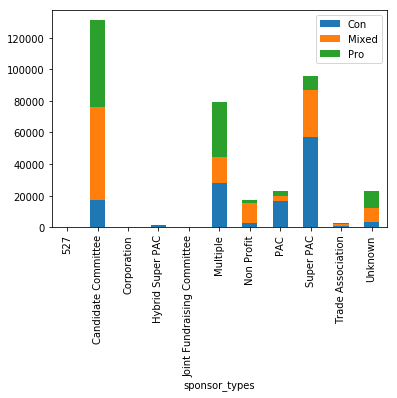

In [41]:
# Place commmentary below and add Percentages to comments to drive home the ppoint
# Let's take a look a message through another lense. I wonder if the type of sponsor who pays for the Ad will affect
# the type of message they choose to put in their Ad.
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
df7 = df.groupby(['sponsor_types','message'])['id'].count().unstack()
df7.columns = ['Con', 'Mixed', 'Pro']
df7.plot(kind='bar', stacked=True)

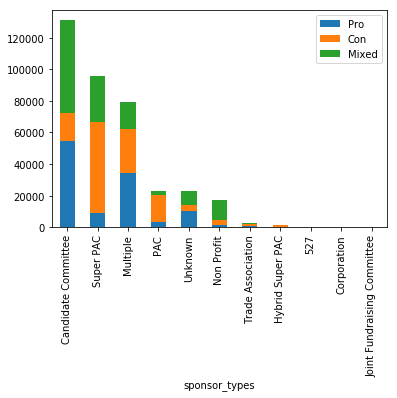

In [49]:
# Let's again arrange in decending order to take a better look.
df7['total'] = df7['Pro'] + df7['Con'] + df7['Mixed']
df8 = df7[['Pro', 'Con', 'Mixed']]
df8 = df7.loc[df7['total'].sort_values(ascending=False).index.tolist()]
df8 = df8[['Pro', 'Con', 'Mixed']]
df8.plot(kind='bar', stacked=True)

In [ ]:
# We can see significant differences here in the Message based on the sponsor type. Candidate Committee and Non Profit 
# funded Ads are predominantly Pro and Mixed while Super PAC and PAC funded Ads. If a Candidate is paying for his own
# Ads it would make sense that they would want to keep a Pro Message to preserve the image of running a clean campaign.
# Non Profits have to consider their donors, a Pro Message is less likely to offened their donors. On the other hand,
# PACs and Super PACs are vehicles that coroporations and donors use to funnel large amounts of money to a specific 
# candidate or cause. They are not run by the Candidate and thus are less connected to their Campaign. This would 
# explain why they are inclined to sponsor more Con Ads. They do not have an image to protect, only a message to 
# convey or a goal to achieve i.e electing a cadidate.

In [ ]:
# While we started with an even distribution of Ads across all message types. When diving into the details of the 
# data we discovered that depending on the Location of the Campaign or the people paying for it we discovered that 
# the distribution of message type can vary greatly. To explore further I would want a larger data source covering more
# Ads in more campaings to see if the trends we discovered hold or more trends emerge across the country.
# We would need this larger data set to provide reccomendations based on this data and would neet to
# research which candidates won each race and by what margin to determine if there was any correlation between 
# winning a race and the characteristcs of Ads shown in our data. Additionally I would want to dig into the
# strategy, goal, and motivation of these Advertisers(Campaigns).